In [77]:
import os
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import yaml



In [78]:
# Set the path to the dataset
dataset_path = '.'

# Set the paths to images and annotations
images_folder = os.path.join(dataset_path, 'Images')
annotations_folder = os.path.join(dataset_path, 'Bounding_Boxes')

# Model configuration
input_shape = (512, 512, 3)  # Adjust based on your image size

In [79]:
class BoundingBox:
    def __init__(self, xmin, ymin, xmax, ymax, class_id, img_path):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax
        self.class_id = class_id
        self.img_path = img_path

    def __repr__(self):
        return f'[{self.xmin}, {self.ymin}, {self.xmax}, {self.ymax} | {self.class_id}]'


In [80]:
# Data preprocessing and loading
def load_data():
    images = []
    annotations = []
    label_map = {}

    # Open Bounding_Boxes/darknet.labels and read class names and put into label_map
    with open(os.path.join(annotations_folder, 'darknet.labels'), 'r') as f:
        class_names = f.readlines()
        for i, class_name in enumerate(class_names):
            label_map[i] = class_name.strip()

    # return images, labels
    for annotation_name in os.listdir(annotations_folder):

        # If no .txt files, continue
        if not annotation_name.endswith('.txt'):
            continue

        # Load image
        image_name = annotation_name.replace('.txt', '.jpg')
        image_path = os.path.join(images_folder, image_name)
        
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        original_image_width, original_image_height = image.shape[1], image.shape[0]
        image = cv2.resize(image, (input_shape[0], input_shape[1]))

        images.append(image)

        # Load annotations
        annotation_path = os.path.join(annotations_folder, annotation_name)
        with open(annotation_path, 'r') as f:
            # Parse bounding box coordinates and class label
            # Example format: class x_min y_min x_max y_max
            lines = f.readlines()
            sub_annotations = []
            for line in lines:
                line = line.strip().split(' ')
                class_label, x_center_relativ, y_center_relativ, width_relativ, height_relativ = map(float, line)

                # Convert normalized coordinates to absolute coordinates
                x_min = int((x_center_relativ - width_relativ / 2) * original_image_width)
                y_min = int((y_center_relativ - height_relativ / 2) * original_image_height)
                x_max = int((x_center_relativ + width_relativ / 2) * original_image_width)
                y_max = int((y_center_relativ + height_relativ / 2) * original_image_height)

                # Rescale coordinates to input_shape
                x_min = int(x_min * input_shape[0] / original_image_width)
                y_min = int(y_min * input_shape[1] / original_image_height)
                x_max = int(x_max * input_shape[0] / original_image_width)
                y_max = int(y_max * input_shape[1] / original_image_height)

                # Store annotation information
                sub_annotations.append(BoundingBox(x_min, y_min, x_max, y_max, int(class_label), image_path))

            annotations.append(sub_annotations)

    # images = np.array(images)

    return images, annotations, label_map


# Load and preprocess the data
images, annotations, label_map = load_data()

images, len(annotations), label_map


([array([[[136,  26,  27],
          [136,  26,  27],
          [136,  26,  27],
          ...,
          [243, 112,  32],
          [243, 112,  32],
          [243, 112,  32]],
  
         [[136,  26,  27],
          [136,  26,  27],
          [136,  26,  27],
          ...,
          [243, 112,  32],
          [243, 112,  32],
          [243, 112,  32]],
  
         [[136,  26,  27],
          [136,  26,  27],
          [136,  26,  27],
          ...,
          [243, 112,  32],
          [243, 112,  32],
          [243, 112,  32]],
  
         ...,
  
         [[136,  26,  27],
          [136,  26,  27],
          [136,  26,  27],
          ...,
          [160,  33,  65],
          [166,  36,  69],
          [176,  42,  76]],
  
         [[136,  26,  27],
          [136,  26,  27],
          [136,  26,  27],
          ...,
          [145,  30,  51],
          [157,  48,  68],
          [152,  50,  68]],
  
         [[136,  26,  27],
          [136,  26,  27],
          [136,  26,  27

In [81]:
annotations[0]


[[12, 141, 225, 270 | 2],
 [14, 271, 224, 335 | 2],
 [13, 335, 223, 403 | 2],
 [13, 404, 223, 449 | 2],
 [11, 449, 220, 494 | 2],
 [281, 20, 481, 70 | 2],
 [284, 71, 481, 117 | 2],
 [16, 146, 213, 165 | 0],
 [14, 273, 208, 287 | 0],
 [16, 338, 210, 357 | 0],
 [14, 408, 215, 427 | 0],
 [18, 451, 214, 471 | 0],
 [284, 28, 472, 47 | 0],
 [287, 73, 472, 91 | 0],
 [20, 166, 217, 175 | 1],
 [21, 174, 217, 182 | 1],
 [20, 182, 217, 190 | 1],
 [20, 189, 218, 199 | 1],
 [20, 199, 217, 206 | 1],
 [19, 206, 218, 213 | 1],
 [18, 213, 218, 221 | 1],
 [17, 221, 218, 229 | 1],
 [19, 228, 218, 237 | 1],
 [19, 237, 218, 245 | 1],
 [18, 244, 219, 253 | 1],
 [18, 253, 219, 260 | 1],
 [21, 288, 218, 298 | 1],
 [22, 298, 218, 306 | 1],
 [21, 306, 217, 314 | 1],
 [20, 314, 217, 321 | 1],
 [20, 321, 216, 329 | 1],
 [22, 358, 217, 367 | 1],
 [21, 367, 217, 375 | 1],
 [21, 375, 218, 383 | 1],
 [21, 383, 218, 391 | 1],
 [21, 391, 217, 400 | 1],
 [19, 428, 216, 435 | 1],
 [19, 435, 216, 443 | 1],
 [24, 472, 213,

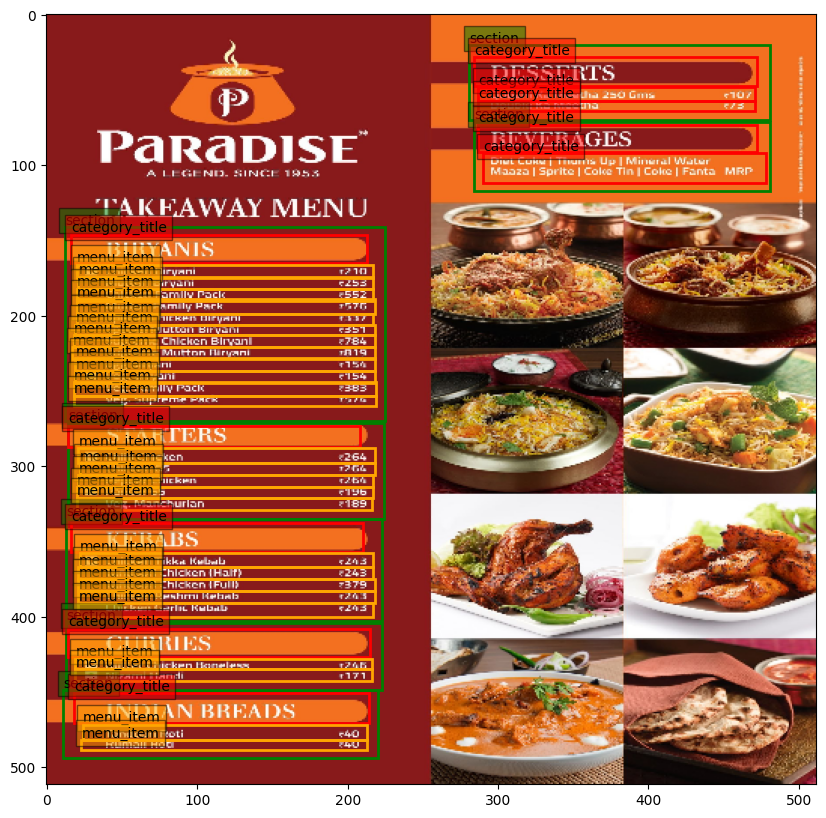

In [82]:
# Helper function to visualize bounding boxes
# It takes an image and a list of bounding boxes as inputs and plots an image with all the bounding boxes
# Each bounding box class should have a different color

color_map = {0: 'red', 1: 'orange', 2: 'green'}

def visualize_bounding_boxes(image, annotations):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    for annotation in annotations:
        xmin, ymin, xmax, ymax, class_id = annotation.xmin, annotation.ymin, annotation.xmax, annotation.ymax, annotation.class_id

        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor=color_map[class_id], linewidth=2)
        ax.add_patch(rect)
        ax.text(xmin, ymin - 2, label_map[class_id], bbox=dict(facecolor=color_map[class_id], alpha=0.5))

    plt.show()

visualize_bounding_boxes(images[0], annotations[0])


In [83]:
def create_dir_or_clean(path):
    os.makedirs(path, exist_ok=True)
    for file in os.listdir(path):
        os.remove(os.path.join(path, file))

def save_images_and_txt_files(train_images, train_annotations, image_train_path, label_train_path, file_base_name):
    for i, (train_image, train_annotation) in enumerate(zip(train_images, train_annotations)):
        image_name = f'{file_base_name}_{i}.jpg'
        label_name = f'{file_base_name}_{i}.txt'

        cv2.imwrite(os.path.join(image_train_path, image_name), train_image)

        with open(os.path.join(label_train_path, label_name), 'w') as f:
            for annotation in train_annotation:
                f.write(f"{annotation[0]} {annotation[1]} {annotation[2]} {annotation[3]} {annotation[4]}\n")


In [84]:

# THis function has the following responsibilities:
# 1. Convert the annotations into the YOLO format
# 2. Split the data into train and validation sets
# 3. Save the data final_datasdet/images/train, final_datasdet/images/val and final_datasdet/labels/train, final_datasdet/labels/val
# 4. Save the label_map into final_datasdet/labels/darknet.labels
# 5. save the yolo configuration yaml file
def save_for_yolo_training(images, annotations):
    # Convert annotations into YOLO format
    yolo_annotations = []
    for sub_annotations in annotations:
        yolo_annotations.append([])
        for annotation in sub_annotations:
            x_center = (annotation.xmin + annotation.xmax) / 2
            y_center = (annotation.ymin + annotation.ymax) / 2
            width = annotation.xmax - annotation.xmin
            height = annotation.ymax - annotation.ymin

            # Normalize coordinates
            x_center /= input_shape[0]
            y_center /= input_shape[1]
            width /= input_shape[0]
            height /= input_shape[1]

            yolo_annotations[-1].append([annotation.class_id, x_center, y_center, width, height])

    # Split into train and validation sets
    train_images, val_images, train_annotations, val_annotations = train_test_split(images, yolo_annotations, test_size=0.2, shuffle=True)

    # Create the directories
    image_train_path = 'final_dataset/images/train'
    image_val_path = 'final_dataset/images/val'
    label_train_path = 'final_dataset/labels/train'
    label_val_path = 'final_dataset/labels/val'
    create_dir_or_clean(image_train_path)
    create_dir_or_clean(image_val_path)
    create_dir_or_clean(label_train_path)
    create_dir_or_clean(label_val_path)

    # Save the images and labels
    save_images_and_txt_files(train_images, train_annotations, image_train_path, label_train_path, 'train')
    save_images_and_txt_files(val_images, val_annotations, image_val_path, label_val_path, 'val')

    # Copy the darknet.labels file to label train and val paths
    os.system(f'cp {os.path.join(annotations_folder, "darknet.labels")} {label_train_path}')
    os.system(f'cp {os.path.join(annotations_folder, "darknet.labels")} {label_val_path}')

    # Create and save the yolo configuration file
    yolo_config = {
        'path': './final_dataset',
        'train': 'images/train',
        'val': 'images/val',
        'nc': len(label_map),
        'names': label_map,

    }
    yaml.dump(yolo_config, open('final_dataset/yolo_config.yaml', 'w'))


save_for_yolo_training(images, annotations)
